In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [23]:
df=pd.read_csv('C://Users/Mithun/Downloads/diabetes_dataset.csv')
pd.set_option('display.max_columns',None)

In [24]:
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Sex                            10000 non-null  object 
 3   Ethnicity                      10000 non-null  object 
 4   BMI                            10000 non-null  float64
 5   Waist_Circumference            10000 non-null  float64
 6   Fasting_Blood_Glucose          10000 non-null  float64
 7   HbA1c                          10000 non-null  float64
 8   Blood_Pressure_Systolic        10000 non-null  int64  
 9   Blood_Pressure_Diastolic       10000 non-null  int64  
 10  Cholesterol_Total              10000 non-null  float64
 11  Cholesterol_HDL                10000 non-null  float64
 12  Cholesterol_LDL                10000 non-null  

In [26]:
df.isnull().sum()

Unnamed: 0                       0
Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
dtype: int64

Creating target variable

In [27]:
df['diabetes']=df['Fasting_Blood_Glucose'].apply(lambda x:1 if x>=126 else 0)

In [28]:
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,0
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1


In [29]:
numeric_column=df[['Age','BMI','Waist_Circumference','Fasting_Blood_Glucose','HbA1c','Blood_Pressure_Systolic','Cholesterol_Total',
                 'Cholesterol_HDL','Cholesterol_LDL','GGT','Serum_Urate','Dietary_Intake_Calories']]

In [30]:
numeric_column.head()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories
0,58,35.8,83.4,123.9,10.9,152,197.8,50.2,99.2,37.5,7.2,1538
1,48,24.1,71.4,183.7,12.8,103,261.6,62.0,146.4,88.5,6.1,2653
2,34,25.0,113.8,142.0,14.5,179,261.0,32.1,164.1,56.2,6.9,1684
3,62,32.7,100.4,167.4,8.8,176,183.4,41.1,84.0,34.4,5.4,3796
4,27,33.5,110.8,146.4,7.1,122,203.2,53.9,92.8,81.9,7.4,3161


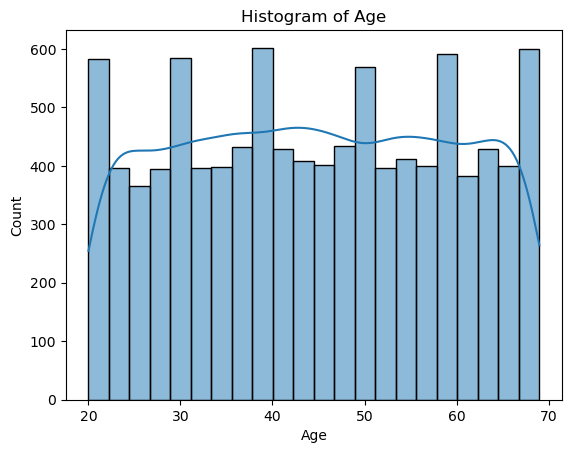

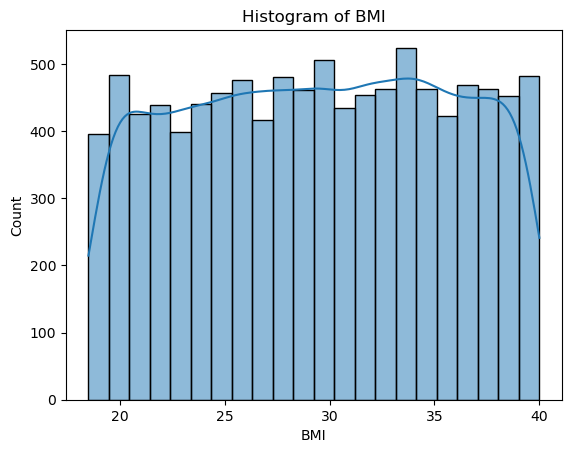

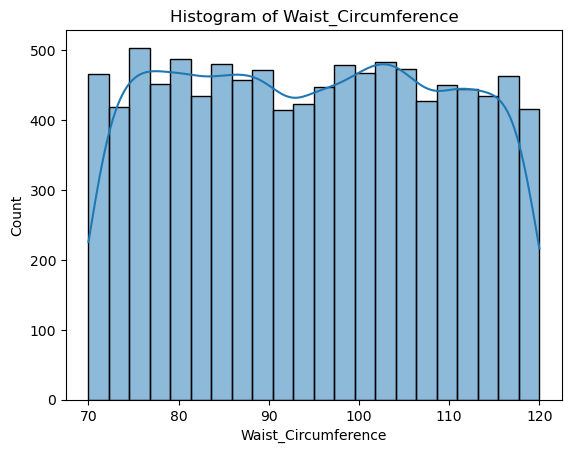

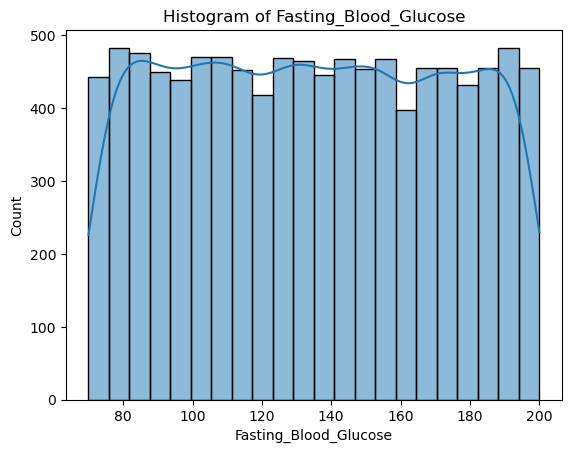

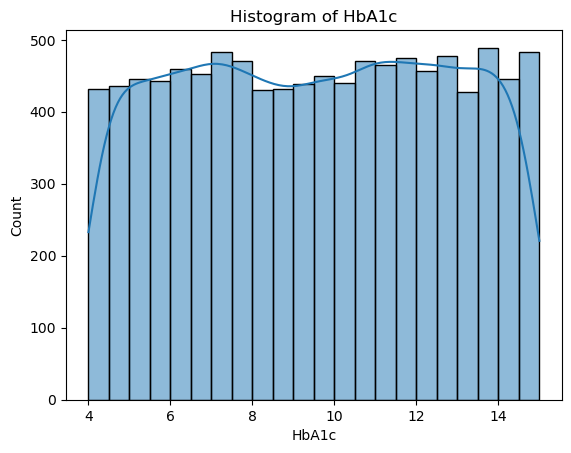

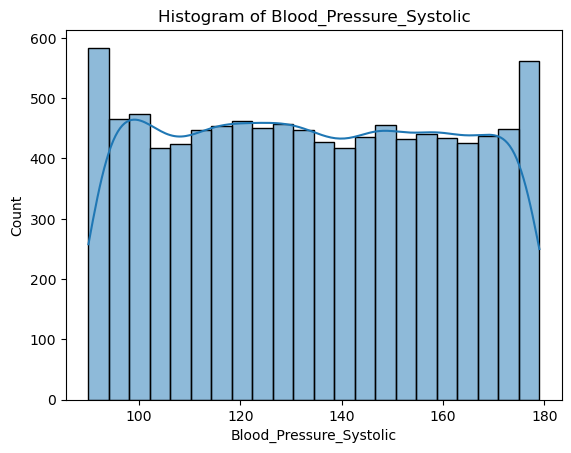

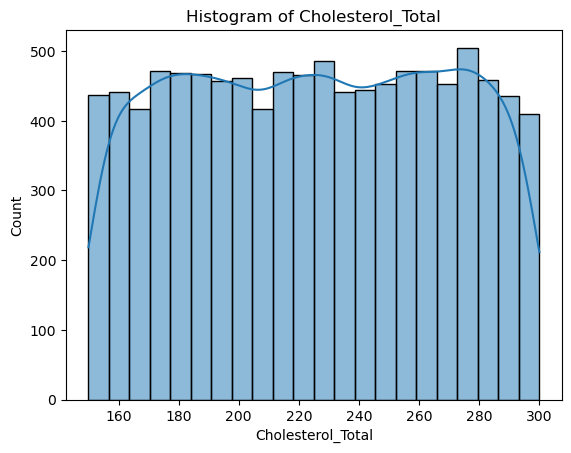

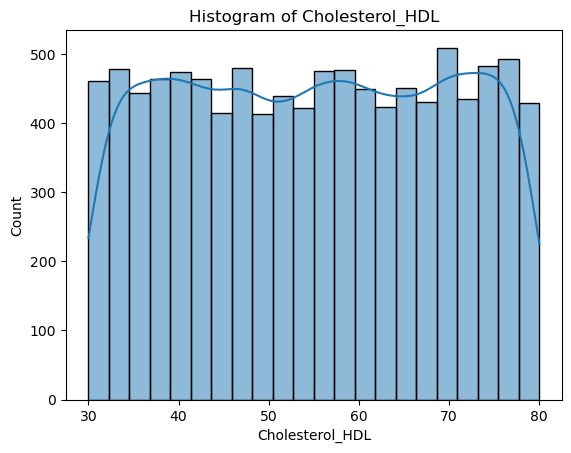

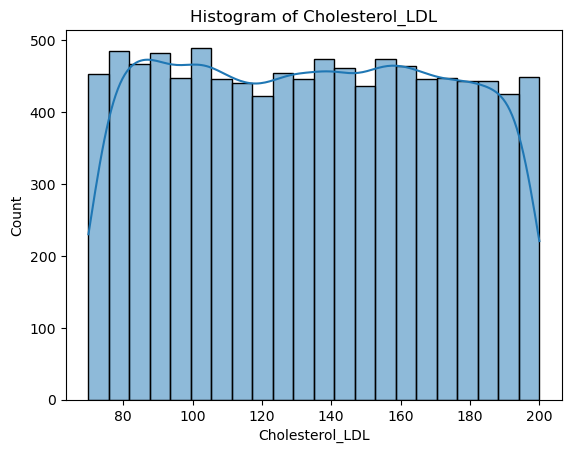

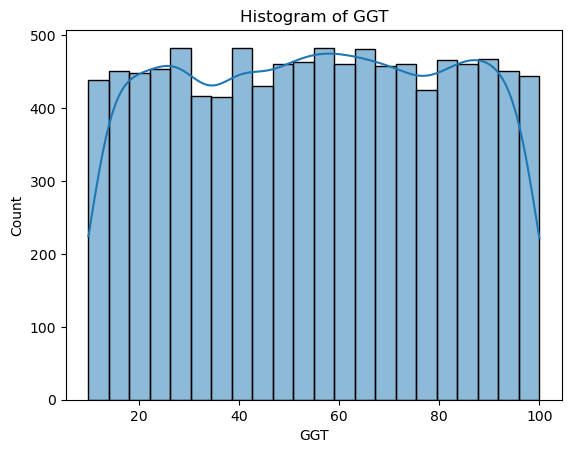

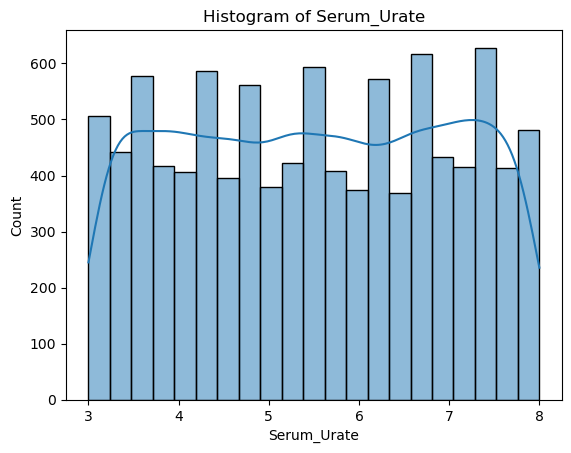

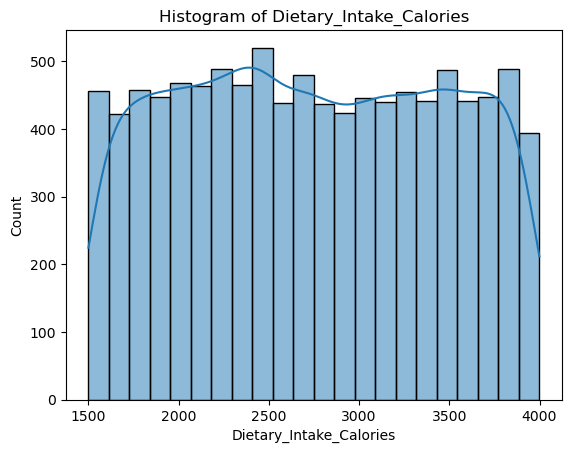

In [31]:
for i in numeric_column.columns:
    f,ax=plt.subplots(1,1)
    sns.histplot(x=numeric_column[i],kde=True)
    plt.title(f"Histogram of {i}")
    ax.set_xlabel(i)

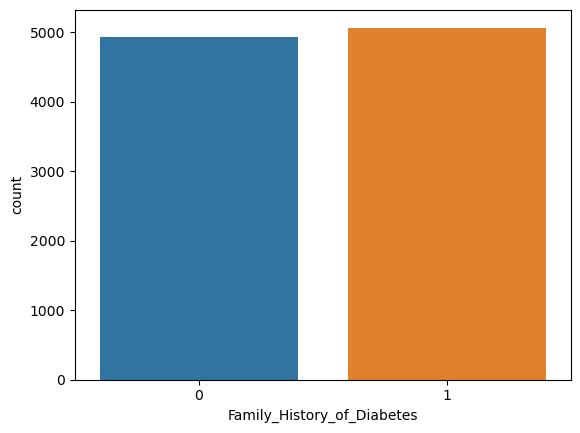

In [32]:
sns.countplot(x=df['Family_History_of_Diabetes']);

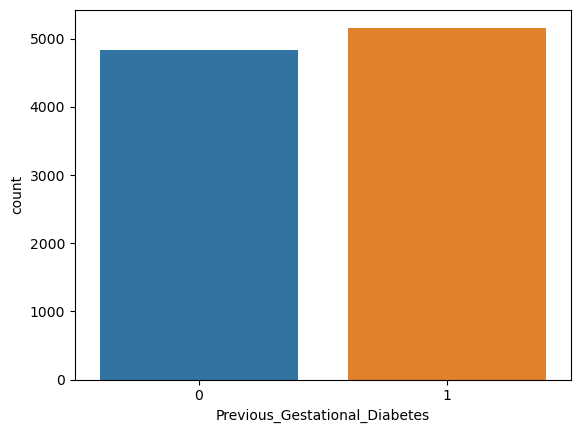

In [33]:
sns.countplot(x=df['Previous_Gestational_Diabetes']);

In [34]:
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,0
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1


In [35]:
categorical=df.select_dtypes(include=object)
categorical

,Sex,Ethnicity,Physical_Activity_Level,Alcohol_Consumption,Smoking_Status
0,Female,White,Moderate,Moderate,Never
1,Male,Asian,Moderate,Moderate,Current
2,Female,Black,Low,Heavy,Former
3,Male,Asian,Low,Moderate,Never
4,Female,Asian,Moderate,Heavy,Current
...,...,...,...,...,...
9995,Female,Asian,Low,None,Former
9996,Female,Asian,Low,None,Never
9997,Female,Asian,High,Heavy,Former
9998,Female,White,High,Moderate,Never


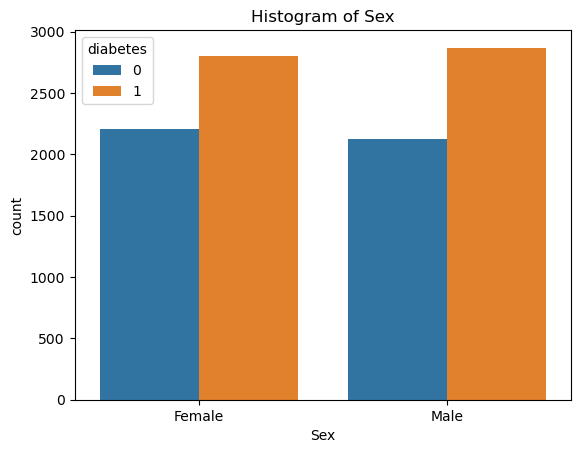

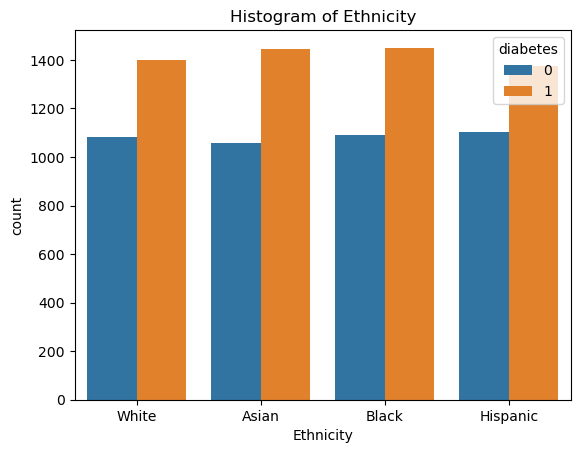

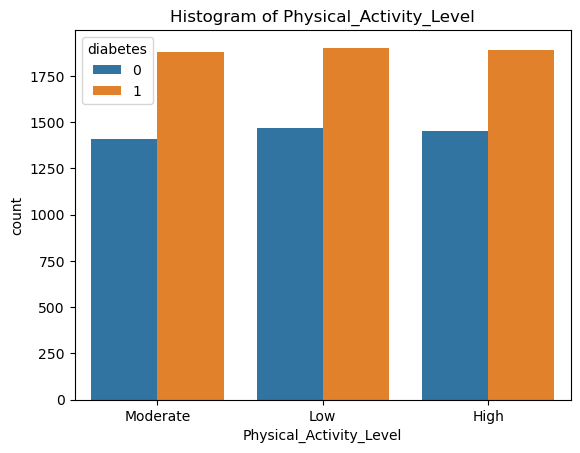

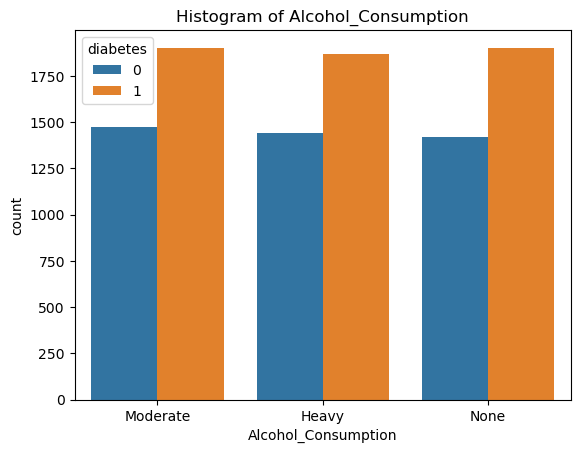

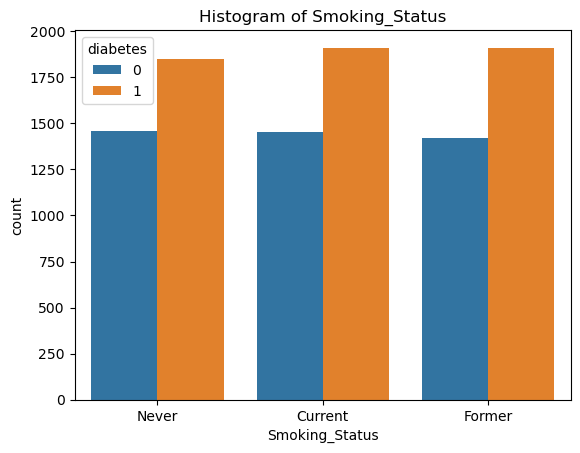

In [60]:
for i in categorical.columns:
    f,ax=plt.subplots(1,1)
    sns.countplot(df[i],hue=df['diabetes'])
    plt.title(f"Histogram of {i}")
    ax.set_xlabel(i)

***Finding Relation with target variable***

In [40]:
smoking_vs_diabetes=df.groupby(['Smoking_Status','diabetes']).agg(total_diabetic=('diabetes','count'))
smoking_vs_diabetes

total_diabetic
Smoking_Status diabetes                
Current        0                   1452
               1                   1912
Former         0                   1419
               1                   1911
Never          0                   1458
               1                   1848

In [41]:
alcohol_vs_diabetes=df.groupby(['Alcohol_Consumption','diabetes']).agg(total_diabetic=('diabetes','count'))

In [42]:
alcohol_vs_diabetes

total_diabetic
Alcohol_Consumption diabetes                
Heavy               0                   1439
                    1                   1868
Moderate            0                   1471
                    1                   1902
None                0                   1419
                    1                   1901

In [43]:
df.head(2)

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,0
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1


In [45]:
activity_vs_diabetes=df.groupby(['Physical_Activity_Level','diabetes']).agg(total_dibetic=('diabetes','count'))

In [46]:
activity_vs_diabetes

total_dibetic
Physical_Activity_Level diabetes               
High                    0                  1452
                        1                  1889
Low                     0                  1470
                        1                  1902
Moderate                0                  1407
                        1                  1880

In [48]:
Sex_vs_diabetes=df.groupby(['Sex','diabetes']).agg(total_diabetic=('diabetes','count'))
Sex_vs_diabetes

total_diabetic
Sex    diabetes                
Female 0                   2203
       1                   2802
Male   0                   2126
       1                   2869

In [49]:
ethnicity_vs_diabetes=df.groupby(['Ethnicity','diabetes']).agg(total_diabetic=('Ethnicity','count'))

In [50]:
ethnicity_vs_diabetes

total_diabetic
Ethnicity diabetes                
Asian     0                   1057
          1                   1446
Black     0                   1089
          1                   1450
Hispanic  0                   1101
          1                   1375
White     0                   1082
          1                   1400

In [51]:
age_vs_diabetes=df.groupby(['Age','diabetes']).agg(total_diabetic=('diabetes','count'))
age_vs_diabetes

total_diabetic
Age diabetes                
20  0                     78
    1                    103
21  0                     74
    1                    131
22  0                     82
...                      ...
67  1                    102
68  0                    102
    1                    123
69  0                     77
    1                    107

[100 rows x 1 columns]

In [52]:
Family_history_vs_diabetes=df.groupby(['Family_History_of_Diabetes','diabetes']).agg(total_diabetic=('diabetes','count'))
Family_history_vs_diabetes

total_diabetic
Family_History_of_Diabetes diabetes                
0                          0                   2120
                           1                   2810
1                          0                   2209
                           1                   2861

In [57]:
df.head(2)

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,0
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1


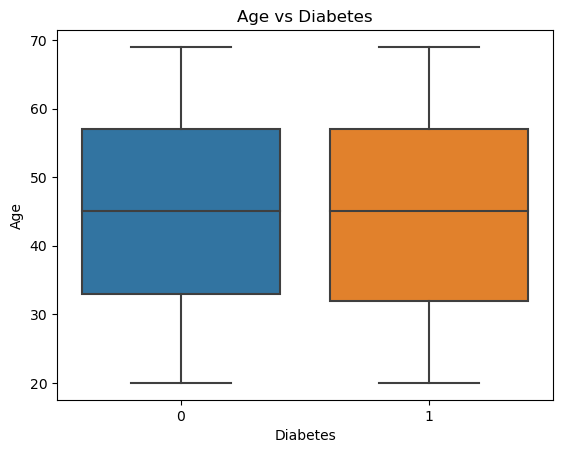

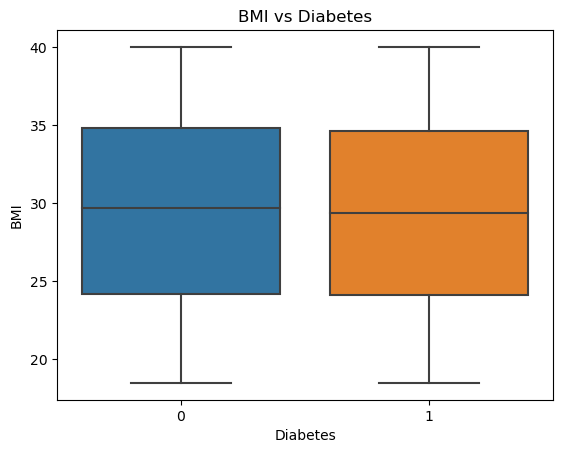

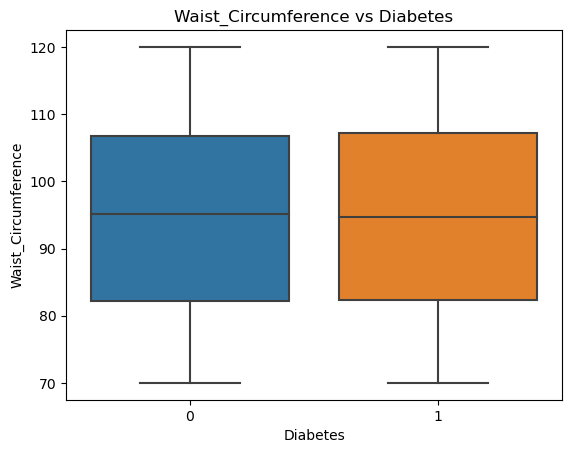

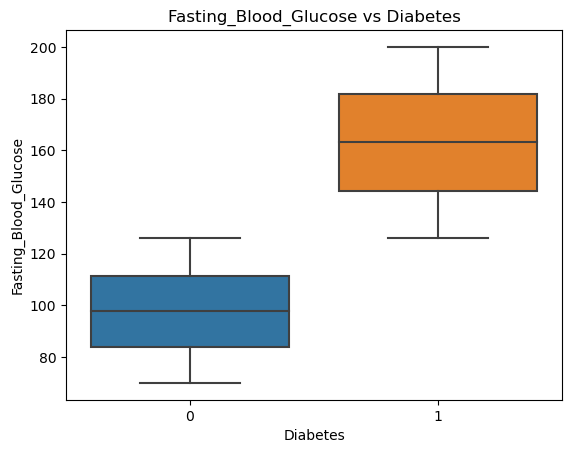

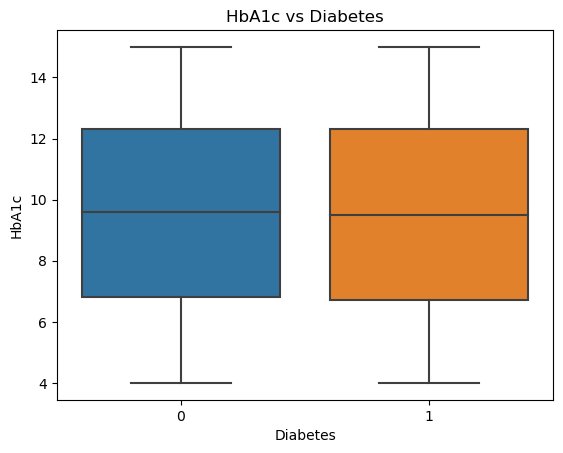

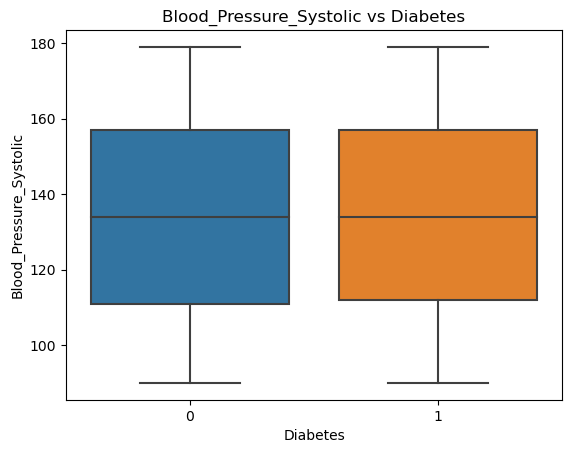

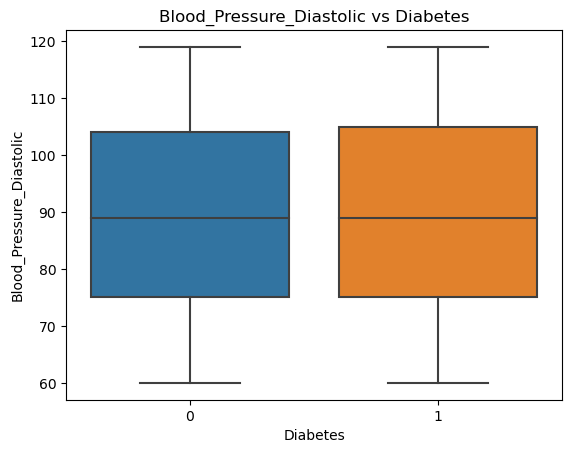

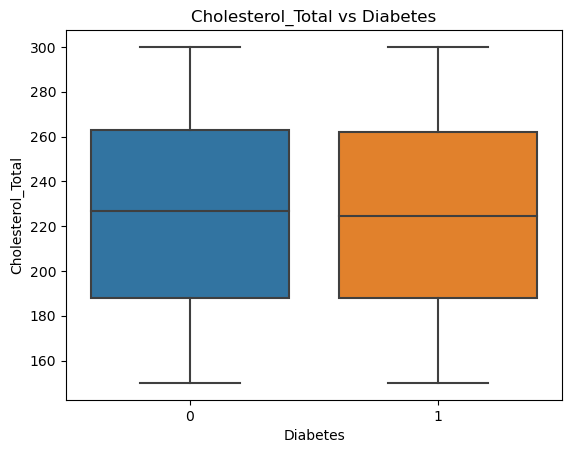

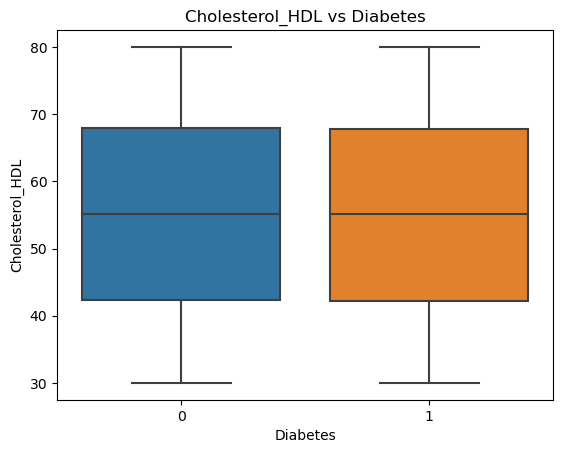

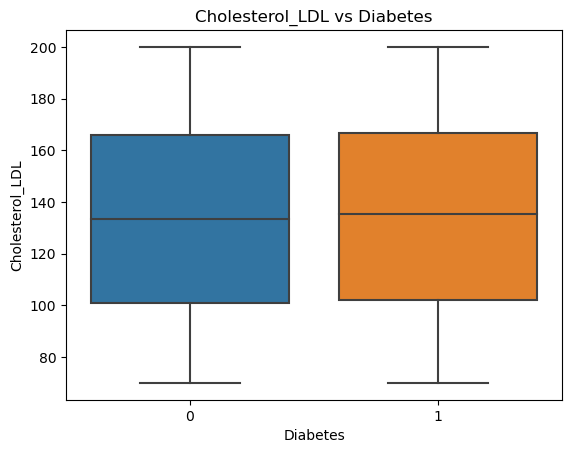

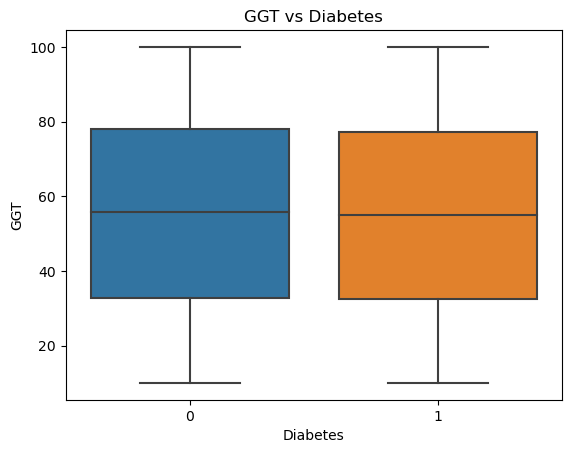

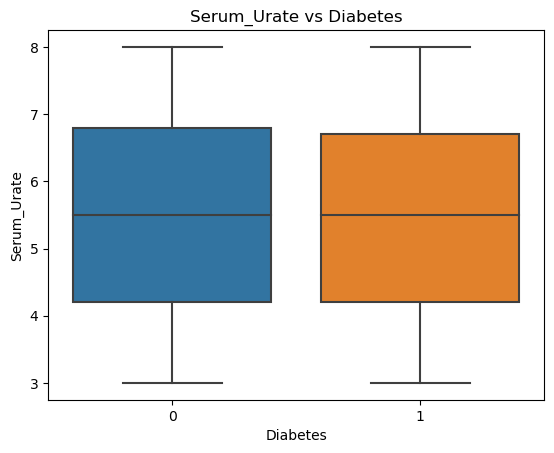

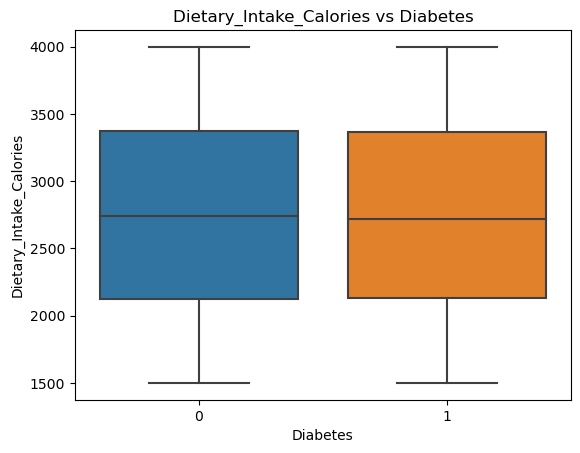

In [59]:
columns=['Age','BMI','Waist_Circumference','Fasting_Blood_Glucose','HbA1c','Blood_Pressure_Systolic','Blood_Pressure_Diastolic','Cholesterol_Total','Cholesterol_HDL','Cholesterol_LDL','GGT','Serum_Urate','Dietary_Intake_Calories']
for i in columns:
    f,ax=plt.subplots(1,1)
    sns.boxplot(x=df['diabetes'],y=df[i])
    plt.title(f'{i} vs Diabetes')
    plt.xlabel('Diabetes')
    ax.set_ylabel(i)
    plt.show()

In [61]:
df.duplicated().sum()

0

In [62]:
df.isnull().sum()

Unnamed: 0                       0
Age                              0
Sex                              0
Ethnicity                        0
BMI                              0
Waist_Circumference              0
Fasting_Blood_Glucose            0
HbA1c                            0
Blood_Pressure_Systolic          0
Blood_Pressure_Diastolic         0
Cholesterol_Total                0
Cholesterol_HDL                  0
Cholesterol_LDL                  0
GGT                              0
Serum_Urate                      0
Physical_Activity_Level          0
Dietary_Intake_Calories          0
Alcohol_Consumption              0
Smoking_Status                   0
Family_History_of_Diabetes       0
Previous_Gestational_Diabetes    0
diabetes                         0
dtype: int64

In [63]:
df=df.drop(['Unnamed: 0'],axis=1)

In [68]:
df.head(2)

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,diabetes
0,58,0,3,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,2,1538,1,2,0,1,0
1,48,1,0,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,2,2653,1,0,0,1,1


In [70]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [67]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Ethnicity']=le.fit_transform(df['Ethnicity'])
df['Physical_Activity_Level']=le.fit_transform(df['Physical_Activity_Level'])
df['Alcohol_Consumption']=le.fit_transform(df['Alcohol_Consumption'])
df['Smoking_Status']=le.fit_transform(df['Smoking_Status'])

In [69]:
X=df.drop(['diabetes'],axis=1)
y=df['diabetes']

In [71]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((8000, 20), (2000, 20), (8000,), (2000,))

***Logistic Regression***

In [72]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_predict=lr.predict(x_test)


In [79]:
print(confusion_matrix(y_test,lr_predict))
print(classification_report(y_test,lr_predict))


[[ 812   56]
 [  47 1085]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       868
           1       0.95      0.96      0.95      1132

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



***Decision Tree***

In [80]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict=dt.predict(x_test)


In [81]:
print(confusion_matrix(y_test,dt_predict))
print(classification_report(y_test,dt_predict))

[[ 868    0]
 [   0 1132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868
           1       1.00      1.00      1.00      1132

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



***Random Forest***

In [82]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)

In [83]:
print(confusion_matrix(y_test,rf_predict))

[[ 868    0]
 [   0 1132]]


In [84]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       868
           1       1.00      1.00      1.00      1132

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [86]:
svc=SVC(probability=True)
svc.fit(x_train,y_train)
svc_predict=svc.predict(x_test)


In [87]:
print(confusion_matrix(y_test,svc_predict))
print(classification_report(y_test,svc_predict))

[[ 867    1]
 [  13 1119]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       868
           1       1.00      0.99      0.99      1132

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

